<a href="https://colab.research.google.com/github/LucasSGonzalez/IAcheck2/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



# Nome: Lucas Sabonaro Gonzalez 
# Rm: 95518
# Turma: 2TDSA

In [19]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

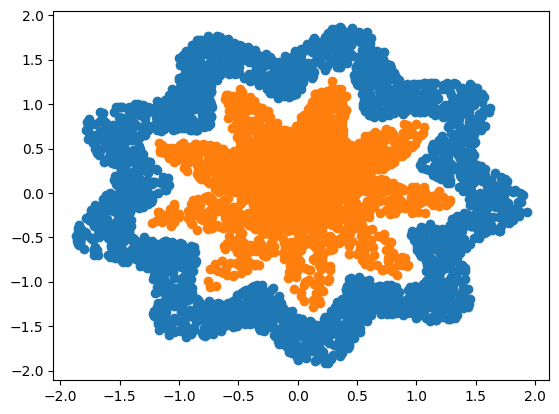

In [20]:
## coloque seu RM aqui!!
RM = [9,5,5,1,8]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [21]:
import pandas as pd

dataframe_c1 = pd.DataFrame(c1,columns=["x","y"])
dataframe_c2 = pd.DataFrame(c2,columns=["x","y"])

dataframe_c1 ["conjunto"] = 0
dataframe_c2 ["conjunto"] = 1

df = pd.concat([dataframe_c1,dataframe_c2])

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop('conjunto', axis=1)
y = df["conjunto"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_train:{y_train.shape}")
print(f"y_test:{y_test.shape}")

X_train:(3920, 2)
X_test:(1680, 2)
y_train:(3920,)
y_test:(1680,)


In [41]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model=Sequential()
# loss: 0.0430 - accuracy: 0.9818 - val_loss: 0.0234 - val_accuracy: 0.9898
# model.add(Dense(200,input_dim=2,activation="relu"))
# model.add(Dense(200,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(1,activation="sigmoid"))

# loss: 0.0586 - accuracy: 0.9796 - val_loss: 0.0463 - val_accuracy: 0.9847
# model.add(Dense(900,input_dim=2,activation="relu"))
# model.add(Dense(500,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(500,activation="relu"))
# model.add(Dense(500,activation="relu"))
# model.add(Dense(500,activation="relu"))
# model.add(Dense(1,activation="sigmoid"))

# loss: 0.0600 - accuracy: 0.9774 - val_loss: 0.0366 - val_accuracy: 0.9809
# model.add(Dense(5,input_dim=2,activation="relu"))
# model.add(Dense(200,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 5)                 15        
                                                                 
 dense_45 (Dense)            (None, 200)               1200      
                                                                 
 batch_normalization_14 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 200)               0         
                                                                 
 dense_46 (Dense)            (None, 1)                 201       
                                                                 
Total params: 2,216
Trainable params: 1,816
Non-trainable params: 400
_________________________________________________

In [29]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
98/98 [==============================] - 2s 5ms/step - loss: 0.2540 - accuracy: 0.9011 - val_loss: 0.5388 - val_accuracy: 0.9656
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 0.9633 - val_loss: 0.4298 - val_accuracy: 0.9439
Epoch 3/50
98/98 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9570 - val_loss: 0.2846 - val_accuracy: 0.9617
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0974 - accuracy: 0.9608 - val_loss: 0.2033 - val_accuracy: 0.9579
Epoch 5/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.9659 - val_loss: 0.1056 - val_accuracy: 0.9732
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9640 - val_loss: 0.0831 - val_accuracy: 0.9758
Epoch 7/50
98/98 [==============================] - 1s 7ms/step - loss: 0.0852 - accuracy: 0.9643 - val_loss: 0.0667 - val_accuracy: 0.9758
Epoch 8/50
98/98 [==

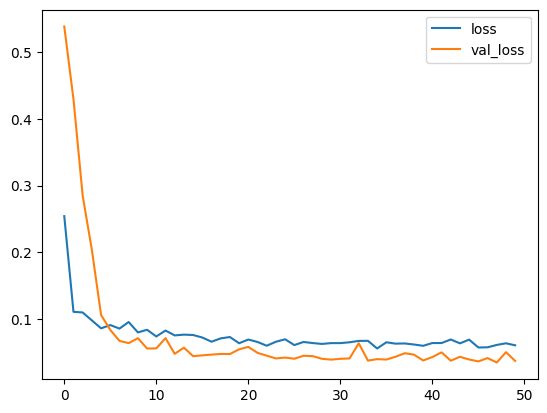

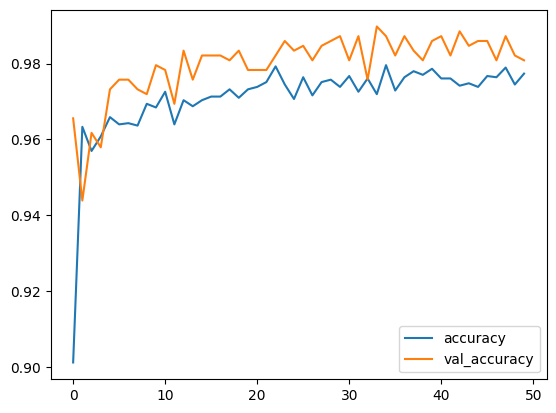

In [30]:
history_df = pd.DataFrame(history.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();